##### **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

import io
list_df = pd.read_csv(io.BytesIO(uploaded['listings.csv']))
list_df.head(5)

Saving listings.csv to listings.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [3]:
list_df.shape

(10272, 16)

##### **Geopandas and Geojson**

In [4]:
!pip install geopandas

In [5]:
!pip install geojsonio

##### **TOP AREAS WITH HIGHEST NUMBER OF LISTING**

In [6]:
from google.colab import files
uploaded = files.upload()
import io
import geopandas as gpd
neighbourhood_json = gpd.read_file(io.BytesIO(uploaded['neighbourhoods.geojson']))
list_df.head(5)



Saving neighbourhoods.geojson to neighbourhoods.geojson


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [7]:
neighbourhood_json = neighbourhood_json.sort_values('neighbourhood')

In [8]:
neighbourhood_json.drop(['neighbourhood_group'], axis=1, inplace = True)

In [9]:
neighbourhood_json.head()

,neighbourhood,geometry
43,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
14,78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
19,78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
29,78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
31,78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."


In [10]:
list_df = list_df.sort_values('neighbourhood')

In [11]:
neighbourhood_json['neighbourhood'].duplicated().any()

False

In [12]:
sample_df = list_df.groupby(['neighbourhood']).count()

In [13]:
neighbourhood_json.set_index('neighbourhood', inplace = True)

In [14]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 5026 to 8548
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                   

In [15]:
list_df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,2.604226e+07,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.500293e+07,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.265000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.319740e+07,1.098138e+07,NaN,78704.000000,30.245163,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,2.580636e+07,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,4.006138e+07,1.410198e+08,NaN,78745.000000,30.305237,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,4.811152e+07,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


In [16]:
list_df['neighbourhood'].unique()

array([78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721,
       78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730,
       78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739,
       78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
       78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759])

In [17]:
list_df['neighbourhood'].duplicated().any()

True

In [18]:
new_listings = list_df.groupby(['neighbourhood']).count()\
    .rename(columns={"id":"count"})

In [19]:
new_listings = new_listings['count']
new_listings.head()

neighbourhood
78701     713
78702    1263
78703     530
78704    1822
78705     505
Name: count, dtype: int64

In [20]:
new_listings = pd.DataFrame(data=new_listings)
new_listings.index = new_listings.index.astype(int)
new_listings.head()

,count
neighbourhood,
78701,713
78702,1263
78703,530
78704,1822
78705,505


In [21]:
neighbourhood_json.sort_index(inplace=True)
neighbourhood_json.index = neighbourhood_json.index.astype(int)
neighbourhood_json.head()

,geometry
neighbourhood,
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."


In [22]:
neighbourhood_json.index.dtype

dtype('int64')

In [23]:
new_listings.index.dtype

dtype('int64')

In [24]:
merged = pd.merge(neighbourhood_json, new_listings, left_index =True, right_index =True, how = 'inner')

In [25]:
listings=list_df
list_df['room_type'].unique()


array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [26]:
Entire_home = listings[listings['room_type'] == 'Entire home/apt'][['neighbourhood','room_type']]
Private_room = listings[listings['room_type'] == 'Private room'][['neighbourhood','room_type']]
Hotel_room = listings[listings['room_type'] == 'Hotel room'][['neighbourhood','room_type']]
Shared_room = listings[listings['room_type'] == 'Shared room'][['neighbourhood','room_type']]

In [27]:
Entire_home = Entire_home.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Private_room = Private_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Hotel_room = Hotel_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Shared_room = Shared_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})

In [28]:
Entire_home.count()

count    44
dtype: int64

In [29]:
Private_room.count()

count    43
dtype: int64

In [30]:
Shared_room.count()

count    27
dtype: int64

In [31]:
Entire_home.head()

,count
neighbourhood,
78701,644
78702,1065
78703,475
78704,1589
78705,345


In [32]:
sample_df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
78701,713,713,713,713,0,713,713,713,713,713,713,420,420,713,713
78702,1263,1263,1263,1263,0,1263,1263,1263,1263,1263,1263,1043,1043,1263,1263
78703,530,530,530,530,0,530,530,530,530,530,530,403,403,530,530
78704,1822,1822,1822,1821,0,1822,1822,1822,1822,1822,1822,1463,1463,1822,1822
78705,505,505,505,505,0,505,505,505,505,505,505,360,360,505,505


In [33]:
neighbourhood_json['count'] = sample_df['id']
for i in range(44):
  neighbourhood_json['count'][i] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
merged = pd.merge(neighbourhood_json,list_df, left_index =True, right_index =True, how = 'inner')

In [35]:
merged.sort_values('count', ascending= False)

,geometry,count,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


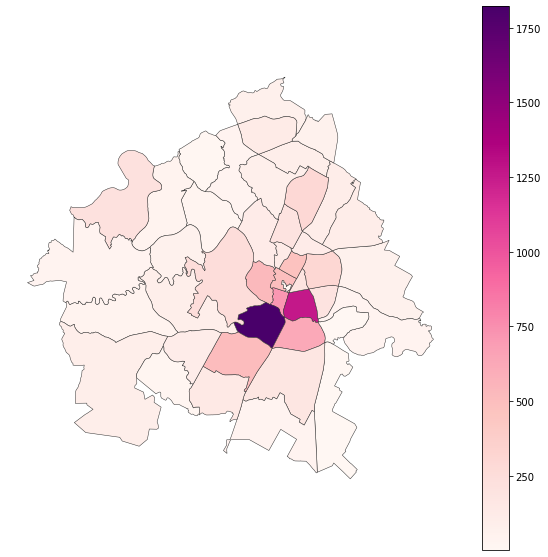

In [36]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

fig = neighbourhood_json.plot(column='count', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

In [37]:
neighbourhood_json = neighbourhood_json.sort_values('count', ascending=False)

neighbourhood_json.head(10)

,geometry,count
neighbourhood,,
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",1822
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",1263
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",713
78741,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",622
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",530
78745,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",513
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",505
78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",478
78723,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",313


##### **TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS**

In [38]:
sample_df = pd.DataFrame(list_df['host_id'])
sample_df['host_name'] = list_df['host_name']

In [39]:
sample_df = sample_df.drop_duplicates()

In [40]:
sample_df = sample_df.sort_values('host_id')

In [41]:
sample_df.reset_index(inplace = True)
sample_df = sample_df.drop(['index'], axis=1)

In [42]:
sample_df.head()

,host_id,host_name
0,23,Charlene
1,2466,Paddy
2,2757,Olivia
3,4569,Glory
4,7148,Peggy


In [43]:
sample_df.shape

(6773, 2)

In [44]:
sample1_df = list_df.copy()
sample1_df = sample1_df.sort_values('host_name')

In [45]:
sample1_df = list_df.groupby(['host_id']).count()
sample1_df.reset_index(inplace = True)

In [46]:
sample1_df.head()

,host_id,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23,3,3,3,0,3,3,3,3,3,3,3,2,2,3,3
1,2466,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3
2,2757,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,4569,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1
4,7148,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2


In [47]:
sample1_df.shape

(6773, 16)

In [48]:
sample_df['listing'] = sample1_df['id']
for i in range(4955):
  sample_df['listing'][i] = sample1_df['id'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
sample_df = sample_df.sort_values('listing', ascending=False)

print('TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS')
sample_df.head(10)

TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS


,host_id,host_name,listing
6668,359036978,Kia,358
5020,104309976,WanderJaunt,131
5070,109638288,TurnKey Vacation Rentals,82
1512,8167447,Martin,81
5199,118565935,Renters Club,56
6636,346827202,Madalynn,48
5941,194953121,Christian,45
6027,210733801,Above,43
6699,368944610,Kia,40
5276,124060715,Evolve Vacation Rental,38
